In [182]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from numpy import ndarray
import os
from tqdm import tqdm
from pathlib import Path
import time
import math
#installed packages


In [2]:
cd Butanol
#change current dir

In [140]:
location = '100000!50860.tif'
#giving a random location

In [141]:
'''
Observation:
1. You can't use threshold to read width and height as the bubble keeps on regressing.
2. If you want to automate the process, then first find if there is a curvature shape in the pic,
    if yes, then crop that part 
3. Blurring of the image helps, but needle part has to be removed somehow.
'''

"\nObservation:\n1. You can't use threshold to read width and height as the bubble keeps on regressing.\n2. If you want to automate the process, then first find if there is a curvature shape in the pic,\n    if yes, then crop that part \n3. Blurring of the image helps, but needle part has to be removed somehow.\n"

<class 'numpy.ndarray'>


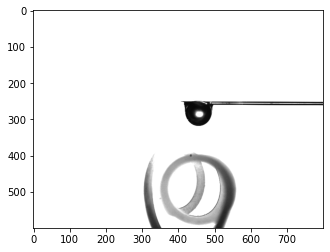

In [172]:
img = cv2.imread(location,cv2.IMREAD_GRAYSCALE)
img.shape
print(type(img))
plt.imshow(img, cmap='gray')
plt.show()

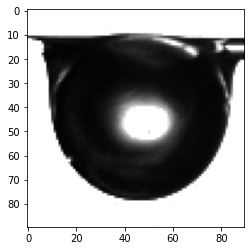

In [184]:
cropped_img = img[240:330,410:500] 
# trail and error done to crop the required portion of the image


plt.imshow(cropped_img, cmap='gray')
plt.show()


In [217]:
path = os.getcwd()
path_ = Path(path)
parent_path = path_.parent.absolute()
# path_but= os.path.join(parent_path, "Butanoln")
# path_A1 = os.path.join(parent_path, "Jet_A1n")
# os.mkdir(path_but)
# os.mkdir(path_A1)
# #creating new directories to store our new cropped and blurred images.

#redundant

In [183]:
def calculateDiameter(img: ndarray)->float:
    max_h = 0
    max_w = 0
    count = 0
    size = 90
    for i in range(90):
        max_h = max(size-np.count_nonzero(img[:,i]), max_h)
        max_w = max(size-np.count_nonzero(img[i,:]), max_w)
    
    return math.sqrt(max_h*max_w)
    

In [234]:
def calculate(path: str)->list:
    diameters = []
    for url in tqdm(os.listdir(path)):
        image = cv2.imread(url,cv2.IMREAD_GRAYSCALE)
        
        cropped_img = image[240:330,410:500]
        eroded_img = cv2.erode(cropped_img, (3,3), iterations=1)
        blurred_img_ = cv2.medianBlur(eroded_img, 27, 0)
        ret, thresh = cv2.threshold(blurred_img_,250,255,cv2.THRESH_TOZERO)
        thresh[thresh>200] = 255
        thresh[thresh<200] = 0
        diameters.append(calculateDiameter(thresh))
        print(calculateDiameter(thresh))
            
    return diameters
    

In [226]:
path_but= 'C:\\Users\\dhana\\Downloads\\propulsion lab\\exp1\\Butanol'
path_a1='C:\\Users\\dhana\\Downloads\\propulsion lab\\exp1\\Jet A1'

In [228]:
diameters_but = calculate(path_but)

100%|█████████████████████████████████████████████████████████████████████████████| 7905/7905 [00:25<00:00, 305.83it/s]


In [229]:
print(len(diameters_but))
diameters_but[0]

7905


78.8416133777081

In [235]:
 calculate(path_a1)

  0%|                                                                                        | 0/20315 [00:00<?, ?it/s]


TypeError: 'NoneType' object is not subscriptable

In [231]:
print(len(diameters_a1))

0


In [ ]:
'''
1 pixel = 0.2645833333 mm
'''

In [225]:
diameters_but_saved = diameters_but

In [ ]:
'''
Following kernels are some experimentation that was done by me, to reach accurate results.
'''

In [92]:
kernel = np.ones((5, 5), np.uint8)

In [27]:
# cropped_img[cropped_img<250]= 0
# cropped_img[cropped_img>250]=255

0.0010008811950683594


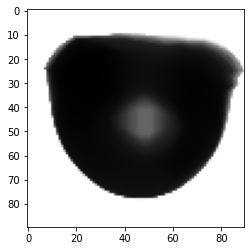

In [148]:
start = time.time()
blurred_img = cv2.medianBlur(cropped_img,27)
end = time.time()
print(end-start)
# cropped_img = cv2.GaussianBlur(cropped_img, (5,5),0)
plt.imshow(blurred_img, cmap='gray')
plt.show()


-0.0009982585906982422


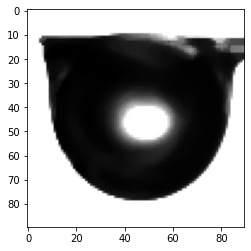

In [149]:
start = time.time()
blurred_img = cv2.medianBlur(cropped_img,5)
end = time.time()
print(start-end)
# cropped_img = cv2.GaussianBlur(cropped_img, (5,5),0)
plt.imshow(blurred_img, cmap='gray')
plt.show()

In [29]:
'''
The difference can be seen. The 5x5 kernel filters out the left rod. So, trail and error with further odd kernels, to see if 
it can filter out the right one as well.
'''

In [30]:
'''
Trying erosion.
Erosion: A pixel in the original image (either 1 or 0) will be considered 1 only if all the pixels under the kernel are 1, otherwise, it is eroded (made to zero).
'''

"\nObservation:\n1. You can't use threshold to read width and height as the bubble keeps on regressing.\n2. If you want to automate the process, then first find if there is a curvature shape in the pic,\n    if yes, then crop that part \n(to be added)\n"

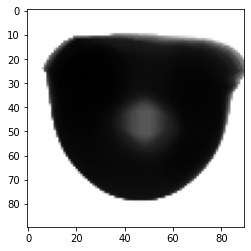

(90, 90)


In [177]:
eroded_img = cv2.erode(cropped_img, (3,3), iterations=1)
blurred_img_ = cv2.medianBlur(eroded_img, 27, 0)
plt.imshow(blurred_img_, cmap='gray')
plt.show()

#the difference between the above blurred image and this is not very apparent.

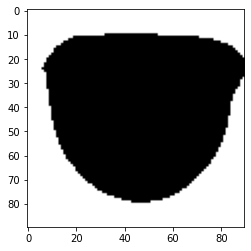

(90, 90)
[  0 255]


In [180]:
ret, thresh = cv2.threshold(blurred_img_,250,255,cv2.THRESH_TOZERO)
plt.imshow(thresh, cmap='gray')
plt.show()
print(thresh.shape)
thresh[thresh>200] = 255
thresh[thresh<200] = 0
#threshold such that there is only 2 values in the image.
print(np.unique(thresh))

In [167]:
cnt,hierachy = cv2.findContours(thresh,cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_NONE )
# mode (finds the outermost contour), method(stores all contour points)
# contours
# np.array(contours).shape -5

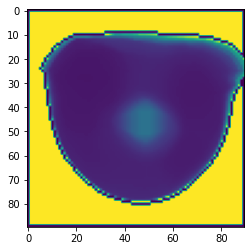

In [171]:
img1=cv2.drawContours(blurred_img_.copy(), cnt, 0, (0,0,0), 1 )
#-1 indicates all contour, 4th parameter represents color, 5th represents thickness.
plt.imshow(img1)
plt.show()

In [56]:
'''
to do: use heirachy
'''

'\nto do: use heirachy\n'

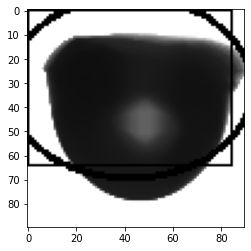

In [159]:
ellipse = cv2.fitEllipse(contours[0])
img2 = cv2.ellipse(blurred_img_, ellipse, (0,255,0),2)
plt.imshow(img2, cmap='gray')
plt.show()
#ecllipse is not working. 